In [1]:
import networkx as nx
import numpy as np
import random
from itertools import combinations

In [2]:
def generate_graph(size):
    nodes = np.arange(1,size+1,1)
    possible_edges = combinations(nodes, 2)
    possible_edges = list(possible_edges)   #possible combinations of nodes
    
    probabilities = np.zeros(len(possible_edges))    #probabilities of edges being added
    
    for i in range(len(probabilities)):
        probabilities[i] = random.uniform(0,1)     #generate probabilities
        
    G = nx.Graph()
    G.add_nodes_from(nodes)   #Add nodes
    
    for i in range(len(possible_edges)):
        number = random.uniform(0,1)
        if number > probabilities[i]:
            G.add_edge(possible_edges[i][0], possible_edges[i][1])    #Add edges
            
    return G

In [3]:
def select_node(graph):
    return random.choice(list(graph.nodes))

In [55]:
def pivot_selection(G, v):     #using max-min
    pivots = []
    nodes = list(G.nodes)
    k = int(len(nodes)/2)
    possible_pivots = nodes.copy()    
    possible_pivots.remove(v)     #list of all possible pivots (excluding the centrality calculation node)
    pivot = random.choice(possible_pivots)     #first pivot selected randomly
    distance_v = []
    
    pivots.append(pivot)      #Add first pivot to pivot list
    possible_pivots.remove(pivot)    #Remove from possible pivots
    distance_v.append(nx.shortest_path_length(G,source = pivot, target = v))    #distance of first pivot from vertex
    
    for i in range(k-1):
        candidate_pivots = []
        candidate_distances = []    #distance of candidate pivot from previous pivot
        distances = dict(nx.shortest_path_length(G))
        distances = {key:val for key, val in distances.items() if key in pivots}    #retrieve only previous pivots
        for previous in distances.keys():
            distances[previous] = {key:val for key, val in distances[previous].items() if key!=v and key not in pivots}
            distances[previous] = {key:val for key, val in sorted(distances[previous].items(), key=lambda item: item[1])}   
            #distances[previous] = [list(distances[previous].keys())[0], list(distances[previous].values())[0]]   #minimum distance
        
            candidate_pivots.append(list(distances[previous].keys())[0])      #node with minimum distance from previous pivot
            candidate_distances.append(list(distances[previous].values())[0])   #minimum distance (first value after sorting)
            
        new_pivot = candidate_pivots[candidate_distances.index(max(candidate_distances))]
        pivots.append(new_pivot)      #Add new pivot to pivot list
        possible_pivots.remove(new_pivot)    #Remove from possible pivots
        distance_v.append(nx.shortest_path_length(G,source = new_pivot, target = v)) 
        
        
        
    return pivots, distance_v

In [59]:
def pivot_selection_2(G, v):     #using max-min
    pivots = []
    nodes = list(G.nodes)
    k = int(len(nodes)/2)
    possible_pivots = nodes.copy()    
    possible_pivots.remove(v)     #list of all possible pivots (excluding the centrality calculation node)
    pivot = random.choice(possible_pivots)     #first pivot selected randomly
    distance_v = []
    
    pivots.append(pivot)      #Add first pivot to pivot list
    possible_pivots.remove(pivot)    #Remove from possible pivots
    distance_v.append(nx.shortest_path_length(G,source = pivot, target = v))    #distance of first pivot from vertex
    
    for i in range(k-1):
        min_distances = []
        for p in pivots:
            distances = []
            for c in possible_pivots:
                distances.append((c, nx.shortest_path_length(G,source=p,target=c)))
            min_distances.append(sorted(distances, key = lambda x: x[1])[0])
        new_pivot = sorted(min_distances, key = lambda x: x[1])[len(min_distances)-1][0]
                
            
        #new_pivot = candidate_pivots[candidate_distances.index(max(candidate_distances))]
        pivots.append(new_pivot)      #Add new pivot to pivot list
        possible_pivots.remove(new_pivot)    #Remove from possible pivots
        distance_v.append(nx.shortest_path_length(G,source = new_pivot, target = v)) 
        
        
        
    return pivots, distance_v

In [62]:
def pivot_selection_3(G, v):     #using max-sum
    pivots = []
    nodes = list(G.nodes)
    k = int(len(nodes)/2)
    possible_pivots = nodes.copy()    
    possible_pivots.remove(v)     #list of all possible pivots (excluding the centrality calculation node)
    pivot = random.choice(possible_pivots)     #first pivot selected randomly
    distance_v = []
    
    pivots.append(pivot)      #Add first pivot to pivot list
    possible_pivots.remove(pivot)    #Remove from possible pivots
    distance_v.append(nx.shortest_path_length(G,source = pivot, target = v))    #distance of first pivot from vertex
    
    for i in range(k-1):
        distances = []
        for p in pivots:
            #distances = []
            for c in possible_pivots:
                distances.append((c, nx.shortest_path_length(G,source=p,target=c)))
        st = set()
        inds = [st.add(a) or ind for ind, (a, b) in enumerate(distances) if a not in st]
        sum_distances = [(distances[j][0], sum(sub[1] for sub in (distances[j:inds[i]] if i < len(inds) else distances[inds[-1]:])))
                            for i, j in enumerate(inds, 1)]   
        new_pivot = sorted(sum_distances, key = lambda x: x[1])[len(sum_distances)-1][0]
                
            
        #new_pivot = candidate_pivots[candidate_distances.index(max(candidate_distances))]
        pivots.append(new_pivot)      #Add new pivot to pivot list
        possible_pivots.remove(new_pivot)    #Remove from possible pivots
        distance_v.append(nx.shortest_path_length(G,source = new_pivot, target = v)) 
        
        
        
    return pivots, distance_v

In [113]:
def pivot_selection_4(G, v):     #using min-sum
    pivots = []
    nodes = list(G.nodes)
    k = int(len(nodes)/2)
    possible_pivots = nodes.copy()    
    possible_pivots.remove(v)     #list of all possible pivots (excluding the centrality calculation node)
    pivot = random.choice(possible_pivots)     #first pivot selected randomly
    distance_v = []
    
    pivots.append(pivot)      #Add first pivot to pivot list
    possible_pivots.remove(pivot)    #Remove from possible pivots
    distance_v.append(nx.shortest_path_length(G,source = pivot, target = v))    #distance of first pivot from vertex
    
    for i in range(k-1):
        distances = []
        for p in pivots:
            #distances = []
            for c in possible_pivots:
                distances.append((c, nx.shortest_path_length(G,source=p,target=c)))
        st = set()
        inds = [st.add(a) or ind for ind, (a, b) in enumerate(distances) if a not in st]
        sum_distances = [(distances[j][0], sum(sub[1] for sub in (distances[j:inds[i]] if i < len(inds) else distances[inds[-1]:])))
                            for i, j in enumerate(inds, 1)]   
        new_pivot = sorted(sum_distances, key = lambda x: x[1])[0][0]
                
            
        #new_pivot = candidate_pivots[candidate_distances.index(max(candidate_distances))]
        pivots.append(new_pivot)      #Add new pivot to pivot list
        possible_pivots.remove(new_pivot)    #Remove from possible pivots
        distance_v.append(nx.shortest_path_length(G,source = new_pivot, target = v)) 
        
        
        
    return pivots, distance_v

In [135]:
def random_pivot(G,v):
    pivots = []
    nodes = list(G.nodes)
    k = int(len(nodes)/2)
    possible_pivots = nodes.copy()    
    possible_pivots.remove(v) 
    distance_v = []
    for i in range(k):
        pivot = random.choice(possible_pivots)
        pivots.append(pivot)
        distance_v.append(nx.shortest_path_length(G,source=pivot,target=v))
        possible_pivots.remove(pivot)
    return pivots, distance_v
    

In [157]:
G1 = nx.erdos_renyi_graph(40, 0.2)

In [158]:
v = select_node(G1)

In [174]:
pivots, distance_v = random_pivot(G1,v)
closeness_centrality_v = float(len(pivots)/sum(distance_v))
closeness_centrality_v

0.5263157894736842

In [160]:
nx.closeness_centrality(G1,v)

0.52

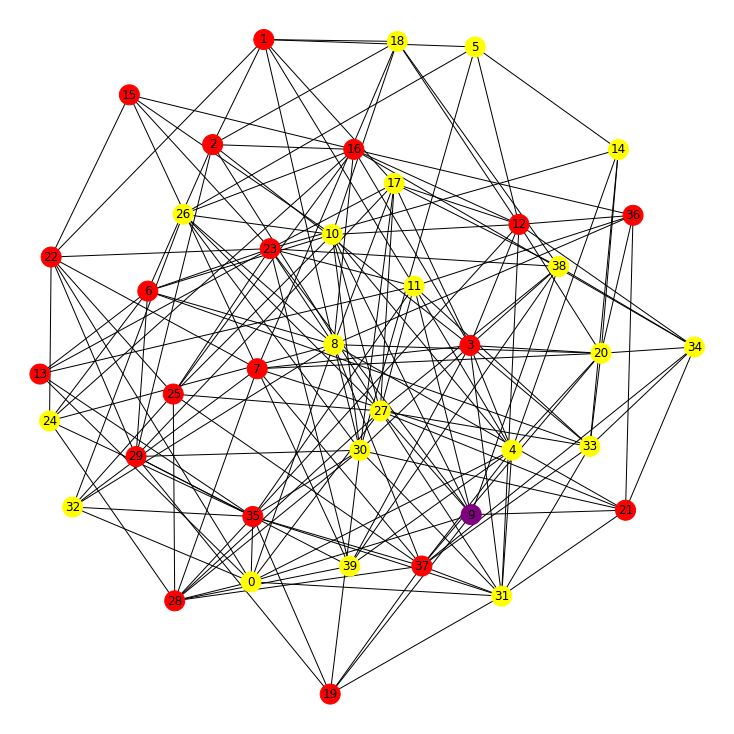

In [175]:
import matplotlib.pyplot as plt
color_map = []
for node in G1:
    if node in pivots:
        color_map.append('yellow')
    elif node == v:
        color_map.append('purple')
    else:
        color_map.append('red')
pos = nx.kamada_kawai_layout(G1)
plt.figure(figsize=(10,10))
nx.draw(G1, pos, node_size=400, node_color=color_map, with_labels = True)
plt.savefig('random-1.png',format='png')
plt.show()
